Random Forest Scenario Classification for Autonomous Driving

In [1]:
import pandas as pd
import seaborn as sns
import glob
import numpy as np
import os

In [11]:
# Add overtake scenarios
df = pd.DataFrame()
overtake_filenames = glob.glob("data\overtake\_overtake*.csv")
for file in overtake_filenames:
    index = file[23:file.index('.')]
    df2 = pd.read_csv(f"data\overtake\_overtake{index}.csv", skiprows=1)
    df2['instance_id'] = index
    df = df.append(df2)
df.shape

(200000, 28)

In [22]:
# Add cut-in scenarios
df_cut_in = pd.DataFrame()
cut_in_filenames = glob.glob("data\cut-in\_cut_in*.csv")
for file in cut_in_filenames:
    index = file[19:file.index('.')]
    df_cut_in_2 = pd.read_csv(f"data\cut-in\_cut_in{index}.csv", skiprows=1)
    df_cut_in_2['instance_id'] = index
    df_cut_in = df_cut_in.append(df_cut_in_2)
df_cut_in.shape

(384000, 28)

In [28]:
# Add ego-cut-behind scenarios
df_ego_cut_behind = pd.DataFrame()
ego_cut_behind_filenames = glob.glob("data\ego-cut-behind\_ego_cut_behind*.csv")
for file in ego_cut_behind_filenames:
    index = file[35:file.index('.')]
    df_ego_cut_behind_2 = pd.read_csv(f"data\ego-cut-behind\_ego_cut_behind{index}.csv", skiprows=1)
    df_ego_cut_behind_2['instance_id'] = index
    df_ego_cut_behind = df_ego_cut_behind.append(df_ego_cut_behind_2)
df_ego_cut_behind.shape

(115200, 28)

In [33]:
# Format dataframe for overtakes
df.columns = [x.replace(' ', '') for x in df.columns]
features = ['time', 'id', 'x', 'y', 'h', 'laneId', 'instance_id']
df = df[features]
df['scenario'] = 'overtake'
df.set_index(['scenario', 'instance_id'], inplace=True)
df.head()

time  id       x    y    h  laneId
scenario instance_id                                    
overtake 0             0.0   0  10.000 -1.5  0.0      -1
         0             0.0   1  -0.000 -4.5  0.0      -2
         0             0.1   0  10.500 -1.5  0.0      -1
         0             0.1   1   0.625 -4.5  0.0      -2
         0             0.2   0  11.000 -1.5  0.0      -1

In [34]:
# Format dataframe for cut-ins
df_cut_in.columns = [x.replace(' ', '') for x in df_cut_in.columns]
features = ['time', 'id', 'x', 'y', 'h', 'laneId', 'instance_id']
df_cut_in = df_cut_in[features]
df_cut_in['scenario'] = 'cut_in'
df_cut_in.set_index(['scenario', 'instance_id'], inplace=True)
df_cut_in.head()

time  id     x    y    h  laneId
scenario instance_id                                  
cut_in   0             0.0   0  5.00 -1.5  0.0      -1
         0             0.0   1 -0.00 -4.5  0.0      -2
         0             0.1   0  6.00 -1.5  0.0      -1
         0             0.1   1  1.35 -4.5  0.0      -2
         0             0.2   0  7.00 -1.5  0.0      -1

In [35]:
# Format dataframe for ego_cut_behinds
df_ego_cut_behind.columns = [x.replace(' ', '') for x in df_ego_cut_behind.columns]
features = ['time', 'id', 'x', 'y', 'h', 'laneId', 'instance_id']
df_ego_cut_behind = df_ego_cut_behind[features]
df_ego_cut_behind['scenario'] = 'ego_cut_behind'
df_ego_cut_behind.set_index(['scenario', 'instance_id'], inplace=True)
df_ego_cut_behind.head()

time  id     x    y    h  laneId
scenario       instance_id                                  
ego_cut_behind 0             0.0   0  10.0 -1.5  0.0      -1
               0             0.0   1  -0.0 -4.5  0.0      -2
               0             0.1   0  12.0 -1.5  0.0      -1
               0             0.1   1   2.2 -4.5  0.0      -2
               0             0.2   0  14.0 -1.5  0.0      -1

In [43]:
# Combine dataframes into master dataframe
df_complete = pd.concat([df, df_cut_in, df_ego_cut_behind])
df_complete.rename({'id':'vehicle_id', 'laneId':'lane_id'}, axis=1, inplace=True)

,,time,vehicle_id,x,y,h,lane_id
scenario,instance_id,,,,,,
cut_in,1663,5.6,1,190.740,-7.5,0.000,-3
overtake,866,7.3,0,309.300,-1.5,0.000,-1
ego_cut_behind,516,2.1,1,76.923,-4.5,0.000,-2
cut_in,909,0.7,1,18.900,-4.5,0.000,-2
overtake,333,9.1,1,204.750,-4.5,0.000,-2
ego_cut_behind,423,7.9,1,284.400,-4.5,0.000,-2
overtake,863,9.8,1,784.000,-4.5,0.000,-2
cut_in,882,7.4,0,158.000,-4.5,0.000,-2
ego_cut_behind,334,7.5,1,315.000,-4.5,0.000,-2


In [46]:
df_complete.head(20)

time  vehicle_id       x    y    h  lane_id
scenario instance_id                                             
overtake 0             0.0           0  10.000 -1.5  0.0       -1
         0             0.0           1  -0.000 -4.5  0.0       -2
         0             0.1           0  10.500 -1.5  0.0       -1
         0             0.1           1   0.625 -4.5  0.0       -2
         0             0.2           0  11.000 -1.5  0.0       -1
         0             0.2           1   1.250 -4.5  0.0       -2
         0             0.3           0  11.500 -1.5  0.0       -1
         0             0.3           1   1.875 -4.5  0.0       -2
         0             0.4           0  12.000 -1.5  0.0       -1
         0             0.4           1   2.500 -4.5  0.0       -2
         0             0.5           0  12.500 -1.5  0.0       -1
         0             0.5           1   3.125 -4.5  0.0       -2
         0             0.6           0  13.000 -1.5  0.0       -1
         0             0.6           1   3.750 -4.5  0.0       -2
         0             0.7           0  13.500 -1.5  0.0       -1
         0             0.7           1   4.375 -4.5  0.0       -2
         0             0.8           0  14.000 -1.5  0.0       -1
         0             0.8           1   5.000 -4.5  0.0       -2
         0             0.9           0  14.500 -1.5  0.0       -1
         0             0.9           1   5.625 -4.5  0.0       -2

In [48]:
df_complete.to_csv('data\df_complete.csv')

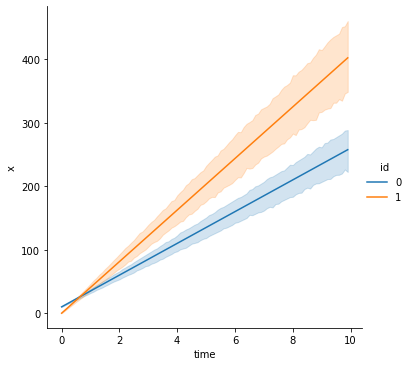

In [4]:
g = sns.relplot(x='time', y='x', data=df, hue='id', kind='line')

In [5]:
df.describe()

,time,id,x,y,h,laneId,instance
count,9600.000000,9600.000000,9600.000000,9600.000000,9600.0,9600.000000,9600.000000
mean,4.950000,0.500000,167.421875,-4.500000,0.0,-2.000000,23.500000
std,2.886757,0.500026,138.712819,2.121431,0.0,0.707144,13.854121
min,0.000000,0.000000,-0.000000,-7.500000,0.0,-3.000000,0.000000
25%,2.475000,0.000000,64.000000,-5.250000,0.0,-2.250000,11.750000
50%,4.950000,0.500000,127.750000,-4.500000,0.0,-2.000000,23.500000
75%,7.425000,1.000000,238.000000,-3.750000,0.0,-1.750000,35.250000
max,9.900000,1.000000,792.000000,-1.500000,0.0,-1.000000,47.000000
